### Logic model using sankey diagram for research proposal overview

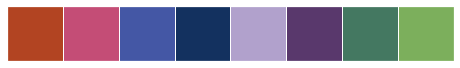

In [3]:
import seaborn as sns
import pandas as pd

sns.set()

def hex_to_rgb(hex_value):
  h = hex_value.lstrip('#')
  return tuple(int(h[i:i + 2], 16) / 255.0 for i in (0, 2, 4))

#copied hex values from MetBrewer source code https://github.com/BlakeRMills/MetBrewer/blob/main/Python/met_brewer/palettes.py
Thomas=["#b24422", "#c44d76", "#4457a5", "#13315f", "#b1a1cc", "#59386c", "#447861", "#7caf5c"]

rgb_colors = list(map(hex_to_rgb, Thomas))

sns.palplot(rgb_colors)

In [4]:
logic = pd.read_excel('logic_model.xls') 
logic

,node,label,source,target,value,percent,node_color,link_color
0,0,Funding,0,1.0,60.0000,0.60,black,#C0C0C0
1,0,Funding,0,2.0,15.0000,0.15,black,#C0C0C0
2,0,Funding,0,3.0,20.0000,0.20,black,#C0C0C0
3,0,Funding,0,4.0,5.0000,0.05,black,#C0C0C0
4,1,Personnel,1,5.0,30.0000,0.50,black,#C0C0C0
5,1,Personnel,1,6.0,30.0000,0.50,black,#C0C0C0
6,2,Research Facilities,2,5.0,7.5000,0.50,black,#C0C0C0
7,2,Research Facilities,2,6.0,7.5000,0.50,black,#C0C0C0
8,3,Research Supplies,3,5.0,10.0000,0.50,black,#C0C0C0
9,3,Research Supplies,3,6.0,10.0000,0.50,black,#C0C0C0


In [5]:
#list for plot inputs
logic_label = logic['label'].drop_duplicates().tolist() 
logic_source = logic['source'].tolist() 
logic_target = logic['target'].tolist() 
logic_value= logic['value'].tolist() 
logic_color= logic.drop_duplicates(subset=['node'], keep="first")
logic_node_color=logic_color['node_color'].tolist()
logic_link_color=logic['link_color'].tolist()


> I absolutely hate that the node label text has a white shaddow that's not removable. I'm going to just add those labels manually

In [14]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    textfont=dict(color="rgba(0,0,0,0)", size=1),
    orientation = "v",
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      #label = logic_label, #uncomment to see node labels
      color = "black"
    ),
    link = dict(
      source = logic_source, # indices correspond to labels
      target = logic_target,
      value = logic_value

  ))])

layout={
      
     }


fig.update_traces( node_line_color="white",node_color=logic_node_color, link_color = logic_link_color,node_thickness=50,textfont_color="black",textfont_size=12,textfont_family="Open Sans")

#change figure sizeing -> 1000x1500 works well for word doc sizing 
fig.update_layout(
    autosize=False,
    width=1200,
    height=1500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

#add column names 
#for x_coordinate, column_name in enumerate(["Outcomes", "Outputs","Activities","Inputs", ""]):
#  fig.add_annotation(
#          x=-.05,
#          y=x_coordinate,
#          xref="paper",
#          yref="y",
#          text=column_name,
#          showarrow=False,
#          font=dict(
#              family="Courier New, monospace",
#              size=16,
#              color="black"
#              ),
#          align="center",
#         )

#Add title, add grid for display
fig.update_layout(
  title_text="Research Proposal Overview", 
  xaxis={
  #set true to help visualize label positions
  'showgrid': False, # thin lines in the background
  'zeroline': False, # thick line at x=0
  'visible': False,  # numbers below
  },
  yaxis={
  'showgrid': False, # thin lines in the background
  'zeroline': False, # thick line at x=0
  'visible': False,  # numbers below
  }, plot_bgcolor='rgba(0,0,0,0)',  font_color= "black", font_size=30)



fig.show()